<a href="https://colab.research.google.com/github/Hyun-Ho95/Web1/blob/master/Mini_Project1_2_%EA%B5%AD%ED%86%A0%EA%B5%90%ED%86%B5%EB%B6%80_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_API_%EB%B0%95%ED%98%84%ED%98%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 수집



## 라이브러리 불러오기

In [1]:
import time
import requests
import pandas as pd
pd.__version__

'1.3.5'

## PublicDataReader 라이브러리 불러오기

In [2]:
# PublicDataReader 활용을 위한 라이브러리 불러오기
# 한 번 설치 이후에는 경고 알림이 떠서 우선 주석처리
!pip install PublicDataReader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## service key

*   공공데이터 포털에 로그인 - > 원하는 오픈 API 서비스 신청 -> 서비스 키 발급



In [3]:
service_key = '7A5%2FTOhM4ON01I6d6vXmuYRocZQucOHj19lSec7FgySDrjdR9FnxyHod%2Bpj8mA3%2BRR%2BD4PXYGmGeAtoOwFeyVg%3D%3D'

## PublicDataReader -> TransactionPrice


*   PublicDataReader 라이브러리 -> TransactionPrice 클래스
*   PublicDataReader as pdr


In [4]:
from PublicDataReader import TransactionPrice
api = TransactionPrice(service_key)
import PublicDataReader as pdr
sigungu_name = "분당구" # 우선 샘플에도 올라와 있는 분당부터
code = pdr.code_bdong()
code.loc[(code['시군구명'].str.contains(sigungu_name, na=False)) &
         (code['읍면동명'].isna())]

,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
5152,41,경기도,41135,성남시 분당구,4113500000,NaN,NaN,19910916,NaN


## get_data()

데이터 조회 인스턴스 api의 get_data() 메서드를 이용해 원하는 부동산 실거래가 데이터를 조회합니다.

| 이름             | 설명                                                                                                                               | 데이터 타입   | 샘플 데이터   | 항목구분    |
|:-----------------|:-----------------------------------------------------------------------------------------------------------------------------------|:--------------|:--------------|:------------|
| property_type    | 부동산 유형<br>(아파트, 오피스텔, 단독다가구, 연립다세대, 토지, 분양입주권, 공장창고등)                                            | String        | 아파트        | 필수        |
| trade_type       | 거래 유형<br>(매매, 전월세)                                                                                                        | String        | 매매          | 필수        |
| sigungu_code     | 시군구의 5자리 지역코드<br>(서울 서초구: 11650, 경기 성남 분당구: 41135)                                                           | String        | 11650         | 필수        |
| year_month       | 조회 년월 (단일 월 조회 시 필수)<br>(2023년 1월: 202301)<br>※ start_year_month와 end_year_month 모두 입력 시 기간 내 조회가 실행됨 | String        | 202301        | 조건부 필수 |
| start_year_month | 조회 시작 년월 (기간 내 조회 시 필수)<br>(2022년 1월 202201)                                                                       | String        | 202201        | 조건부 필수 |
| end_year_month   | 조회 종료 년월 (기간 내 조회 시 필수)<br>(2022년 12월: 202212)                                                                     | String        | 202212        | 조건부 필수 |
| verbose          | 데이터 조회 진행 상황 메시지 출력 여부<br>(출력: True, 미출력: False)<br>※ 기본값: False                                           | Boolean       | True          | 선택        |

In [5]:
# 2022년 아파트 매매 
df_apt_dealing = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="41135",
    start_year_month = '202201',
    end_year_month = '202212',
    verbose = True
    )
df_apt_dealing
# Index(['지역코드', '도로명', '법정동', '지번', '아파트', '건축년도', '층', '전용면적', '년', '월', '일',
#    '거래금액', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드', '도로명일련번호코드',
#    '도로명지상지하코드', '도로명코드', '법정동본번코드', '법정동부번코드', '법정동시군구코드', '법정동읍면동코드',
#    '법정동지번코드', '일련번호', '거래유형', '중개사소재지', '해제사유발생일', '해제여부'],
#   dtype='object')
# 상기 데이터 중에서 필요한 값만 가져오기
df_apt_dealing.drop(labels=['지번','층','도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드', '도로명일련번호코드',
                '도로명지상지하코드', '도로명코드', '법정동본번코드', '법정동부번코드', '법정동시군구코드', '법정동읍면동코드',
               '법정동지번코드', '일련번호','중개사소재지', '해제사유발생일', '해제여부'], axis = 1, inplace = True)
# 여러개의 컬럼 지울 때는 list에 할당 해준 후 없애기. inplace = True 해주어야 영구적으로 데이터에서 사라짐
cols = ['지역코드', '도로명', '법정동', '아파트', '건축년도','전용면적','년', '월', '일', '거래금액(단위 : 만원)',  '거래유형']
df_apt_dealing.columns = cols 
df_apt_dealing

202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212


,지역코드,도로명,법정동,아파트,건축년도,전용면적,년,월,일,거래금액(단위 : 만원),거래유형
0,41135,장안로51번길,분당동,장안타운(건영),1993,85.000,2022,1,12,110500,중개거래
1,41135,수내로,분당동,샛별마을(우방),1994,57.280,2022,1,21,98500,중개거래
2,41135,내정로174번길,수내동,파크타운(서안),1993,84.780,2022,1,3,136000,중개거래
3,41135,내정로165번길,수내동,양지마을(5단지)(한양501-514),1992,42.560,2022,1,5,63000,직거래
4,41135,수내로,수내동,푸른마을(신성),1992,59.780,2022,1,5,92000,중개거래
...,...,...,...,...,...,...,...,...,...,...,...
1086,41135,산운로,운중동,산운마을8단지(부영사랑으로),2008,59.612,2022,12,3,87500,중개거래
1087,41135,판교원로82번길,운중동,산운마을13단지(태영),2010,84.720,2022,12,9,113000,중개거래
1088,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래
1089,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래


In [6]:
file_name = '2022년 분당구 아파트 매매 거래 조회.csv'
df_apt_dealing.to_csv(file_name, index = False)

In [7]:
pd.read_csv(file_name)

,지역코드,도로명,법정동,아파트,건축년도,전용면적,년,월,일,거래금액(단위 : 만원),거래유형
0,41135,장안로51번길,분당동,장안타운(건영),1993,85.000,2022,1,12,110500,중개거래
1,41135,수내로,분당동,샛별마을(우방),1994,57.280,2022,1,21,98500,중개거래
2,41135,내정로174번길,수내동,파크타운(서안),1993,84.780,2022,1,3,136000,중개거래
3,41135,내정로165번길,수내동,양지마을(5단지)(한양501-514),1992,42.560,2022,1,5,63000,직거래
4,41135,수내로,수내동,푸른마을(신성),1992,59.780,2022,1,5,92000,중개거래
...,...,...,...,...,...,...,...,...,...,...,...
1086,41135,산운로,운중동,산운마을8단지(부영사랑으로),2008,59.612,2022,12,3,87500,중개거래
1087,41135,판교원로82번길,운중동,산운마을13단지(태영),2010,84.720,2022,12,9,113000,중개거래
1088,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래
1089,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래


# 2. 데이터 전처리

▣ 데이터 정보

In [8]:
df_apt_dealing.info()
#2022년 아파트 매매 거래는 총 1085 건

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역코드           1091 non-null   object 
 1   도로명            1091 non-null   object 
 2   법정동            1091 non-null   object 
 3   아파트            1091 non-null   object 
 4   건축년도           1091 non-null   Int64  
 5   전용면적           1091 non-null   float64
 6   년              1091 non-null   Int64  
 7   월              1091 non-null   Int64  
 8   일              1091 non-null   Int64  
 9   거래금액(단위 : 만원)  1091 non-null   Int64  
 10  거래유형           1091 non-null   object 
dtypes: Int64(5), float64(1), object(5)
memory usage: 99.2+ KB


▣ 범주형 변수 기술통계

In [9]:
df_apt_dealing.describe(include = 'O')

,지역코드,도로명,법정동,아파트,거래유형
count,1091,1091,1091,1091,1091
unique,1,56,13,170,2
top,41135,중앙공원로,정자동,시범한양,중개거래
freq,1091,102,237,53,1029


▣ 수치형 변수 기술통계

In [10]:
df_apt_dealing.describe()

,건축년도,전용면적,년,월,일,거래금액(단위 : 만원)
count,1091.000000,1091.000000,1091.0,1091.000000,1091.000000,1091.000000
mean,1995.935839,84.438366,2022.0,4.716774,15.298808,124687.106324
std,6.067775,40.886161,0.0,2.820222,8.460626,53855.281861
min,1991.000000,28.160000,2022.0,1.000000,1.000000,38000.000000
25%,1992.000000,53.600000,2022.0,3.000000,8.000000,82000.000000
50%,1994.000000,83.330000,2022.0,4.000000,16.000000,118000.000000
75%,1995.000000,102.977450,2022.0,5.000000,22.000000,154000.000000
max,2021.000000,244.700000,2022.0,12.000000,31.000000,490000.000000


In [11]:
# 와...작년 7월에 거래된 21년도 신축아파트인 더샵 판교 퍼스트파크는 49억에 거래됐습니다..
# 전용면적단위가 제곱미터니까 평으로 환산하면 70평...ㄷㄷ
df_apt_dealing[df_apt_dealing['거래금액(단위 : 만원)'] >= 490000]

,지역코드,도로명,법정동,아파트,건축년도,전용면적,년,월,일,거래금액(단위 : 만원),거래유형
920,41135,판교백현로,백현동,THESHARP판교퍼스트파크,2021,229.033,2022,7,8,490000,직거래


▣ 결측 값 확인

In [12]:
# 한번에 DF으로 감싸주지 않으면 그냥 시리즈 형태로 출력
# pd.DataFrame(df_apt_dealing).isnull().sum()
pd.DataFrame(df_apt_dealing.isnull().sum())

,0
지역코드,0
도로명,0
법정동,0
아파트,0
건축년도,0
전용면적,0
년,0
월,0
일,0
거래금액(단위 : 만원),0


▣ 중복 값 확인

In [13]:
df_apt_dealing.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1086    False
1087    False
1088    False
1089     True
1090    False
Length: 1091, dtype: bool

In [14]:
# 분당에서도 판교가 땅값이 비싸니까 판교 '삼평동' '판교동' '백현동' '운중동' 의 거래가 알아보기
# 1.동 별 평균 거래가 알아보기

In [15]:
df_pangyo_sampyeong = df_apt_dealing[df_apt_dealing['법정동'] == '삼평동']
#df_pangyo_sampyeong.shape -> 20건

In [16]:
df_pangyo_pangyo = df_apt_dealing[df_apt_dealing['법정동'] == '판교동']
# df_pangyo_pangyo.shape - > 30건

In [17]:
df_pangyo_baekhyeon = df_apt_dealing[df_apt_dealing['법정동'] == '백현동']
# df_pangyo_baekhyeon.shape -> 36건

In [18]:
df_pangyo_unjung = df_apt_dealing[df_apt_dealing['법정동'] == '운중동']
# df_pangyo_unjung.shape -> 27건
# 판교지부에서 113건. 분당구 전체의 1/10 거래량

In [19]:
df_pangyo = pd.concat([df_pangyo_sampyeong, df_pangyo_pangyo, df_pangyo_baekhyeon, df_pangyo_unjung], ignore_index=True)
df_pangyo

,지역코드,도로명,법정동,아파트,건축년도,전용면적,년,월,일,거래금액(단위 : 만원),거래유형
0,41135,동판교로177번길,삼평동,판교호반써밋플레이스,2012,131.240,2022,1,28,240000,중개거래
1,41135,동판교로,삼평동,봇들마을1단지(판교신미주),2009,83.459,2022,2,17,148000,중개거래
2,41135,동판교로,삼평동,봇들마을4단지(주공),2009,74.450,2022,2,17,157000,중개거래
3,41135,동판교로,삼평동,봇들마을4단지(주공),2009,84.690,2022,3,1,158000,중개거래
4,41135,동판교로,삼평동,봇들마을3단지(주공),2009,59.950,2022,3,5,130000,중개거래
...,...,...,...,...,...,...,...,...,...,...,...
108,41135,산운로,운중동,산운마을8단지(부영사랑으로),2008,59.612,2022,12,3,87500,중개거래
109,41135,판교원로82번길,운중동,산운마을13단지(태영),2010,84.720,2022,12,9,113000,중개거래
110,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래
111,41135,판교원로,운중동,산운마을11단지(판교포레라움),2009,59.900,2022,12,10,100000,중개거래


In [20]:
df_pangyo.describe()

,건축년도,전용면적,년,월,일,거래금액(단위 : 만원)
count,113.000000,113.000000,113.0,113.000000,113.000000,113.000000
mean,2009.955752,94.060590,2022.0,5.654867,15.247788,170612.592920
std,2.361860,28.011814,0.0,3.619811,8.539332,67246.427807
min,2008.000000,51.160000,2022.0,1.000000,1.000000,55673.000000
25%,2009.000000,81.412000,2022.0,3.000000,8.000000,127000.000000
50%,2009.000000,84.920000,2022.0,5.000000,15.000000,157000.000000
75%,2010.000000,103.964900,2022.0,9.000000,23.000000,195000.000000
max,2021.000000,229.033000,2022.0,12.000000,31.000000,490000.000000


▣ 이상치 확인

In [21]:
# 여기서부터는 다른 분들것 참고..ㅎㅎ(시각화 등등)

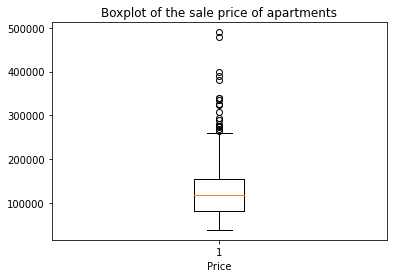

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(df_apt_dealing['거래금액(단위 : 만원)'])
plt.xlabel('Price')
plt.title('Boxplot of the sale price of apartments')
plt.show()